<img src="https://storage.googleapis.com/ultralytics/logo/logoname1000.png" width="150">

<table align="center"><td>
  <a target="_blank"  href="https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.sandbox.google.com/github/ultralytics/yolov3/blob/master/tutorial.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.







In [2]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.1.0 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


Clone repository and download COCO 2014 dataset (20GB):

In [0]:
!git clone https://github.com/ultralytics/yolov3  # clone
!bash yolov3/data/get_coco2014.sh  # copy COCO2014 dataset (19GB)
%cd yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 4781 (delta 35), reused 37 (delta 17), pack-reused 4720
Receiving objects: 100% (4781/4781), 4.74 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (3254/3254), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2455      0 --:--:-- --:--:-- --:--:--  2440
100 18.8G    0 18.8G    0     0   189M      0 --:--:--  0:01:42 --:--:--  174M
/content/yolov3


Run `detect.py` to perform inference on images in `data/samples` folder:

Namespace(cfg='cfg/yolov3-spp.cfg', conf_thres=0.5, data='data/coco.data', fourcc='mp4v', images='data/samples', img_size=416, nms_thres=0.5, output='output', weights='weights/yolov3-spp.weights')
Using CUDA with Apex device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/2 data/samples/bus.jpg: 416x320 3 persons, 1 buss, 1 handbags, Done. (0.119s)
image 2/2 data/samples/zidane.jpg: 256x416 2 persons, 1 ties, Done. (0.085s)
Results saved to /content/yolov3/output


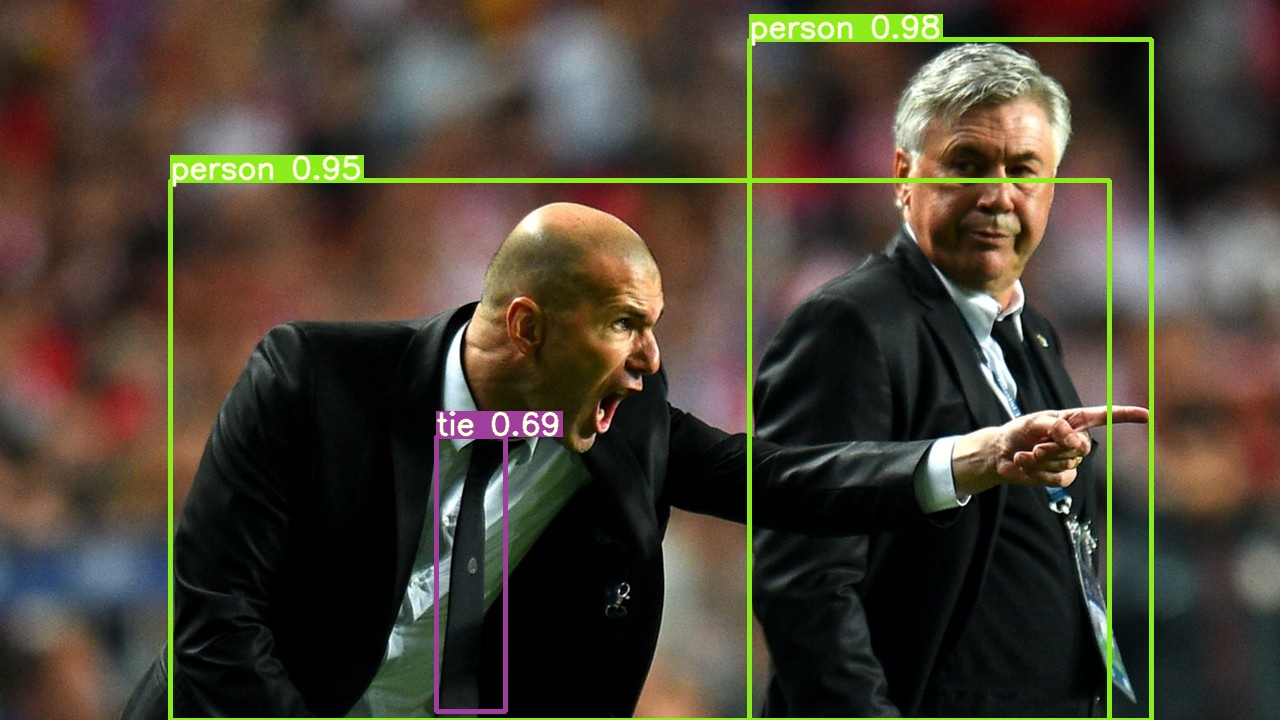

In [0]:
!python3 detect.py
Image(filename='output/zidane.jpg', width=600)

Run `train.py` to train YOLOv3-SPP starting from a darknet53 backbone:

In [0]:
!python3 train.py --data data/coco_64img.data --img-size 320 --epochs 3 --nosave

Run `test.py` to evaluate the performance of a trained darknet or PyTorch model:

In [0]:
!python3 test.py --data data/coco.data --save-json --img-size 416  # 0.565 mAP

Namespace(batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/coco.data', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=True, weights='weights/yolov3-spp.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  240M  100  240M    0     0  17.9M      0  0:00:13  0:00:13 --:--:-- 20.3M
                         Class    Images   Targets         P         R       mAP        F1: 100% 313/313 [11:14<00:00,  3.02s/it]
                           all     5e+03  3.58e+04     0.107     0.749     0.557     0.182
                        person     5e+03  1.09e+04     0.138     0.846     0.723     0.238
                       bicycle     5e+03       316    0.0663     0.696     0.474     0.121
                           car     5e+03  1.67e+03    0.0682     0.781     0.586     0.1

Reproduce tutorial training runs and plot training results:

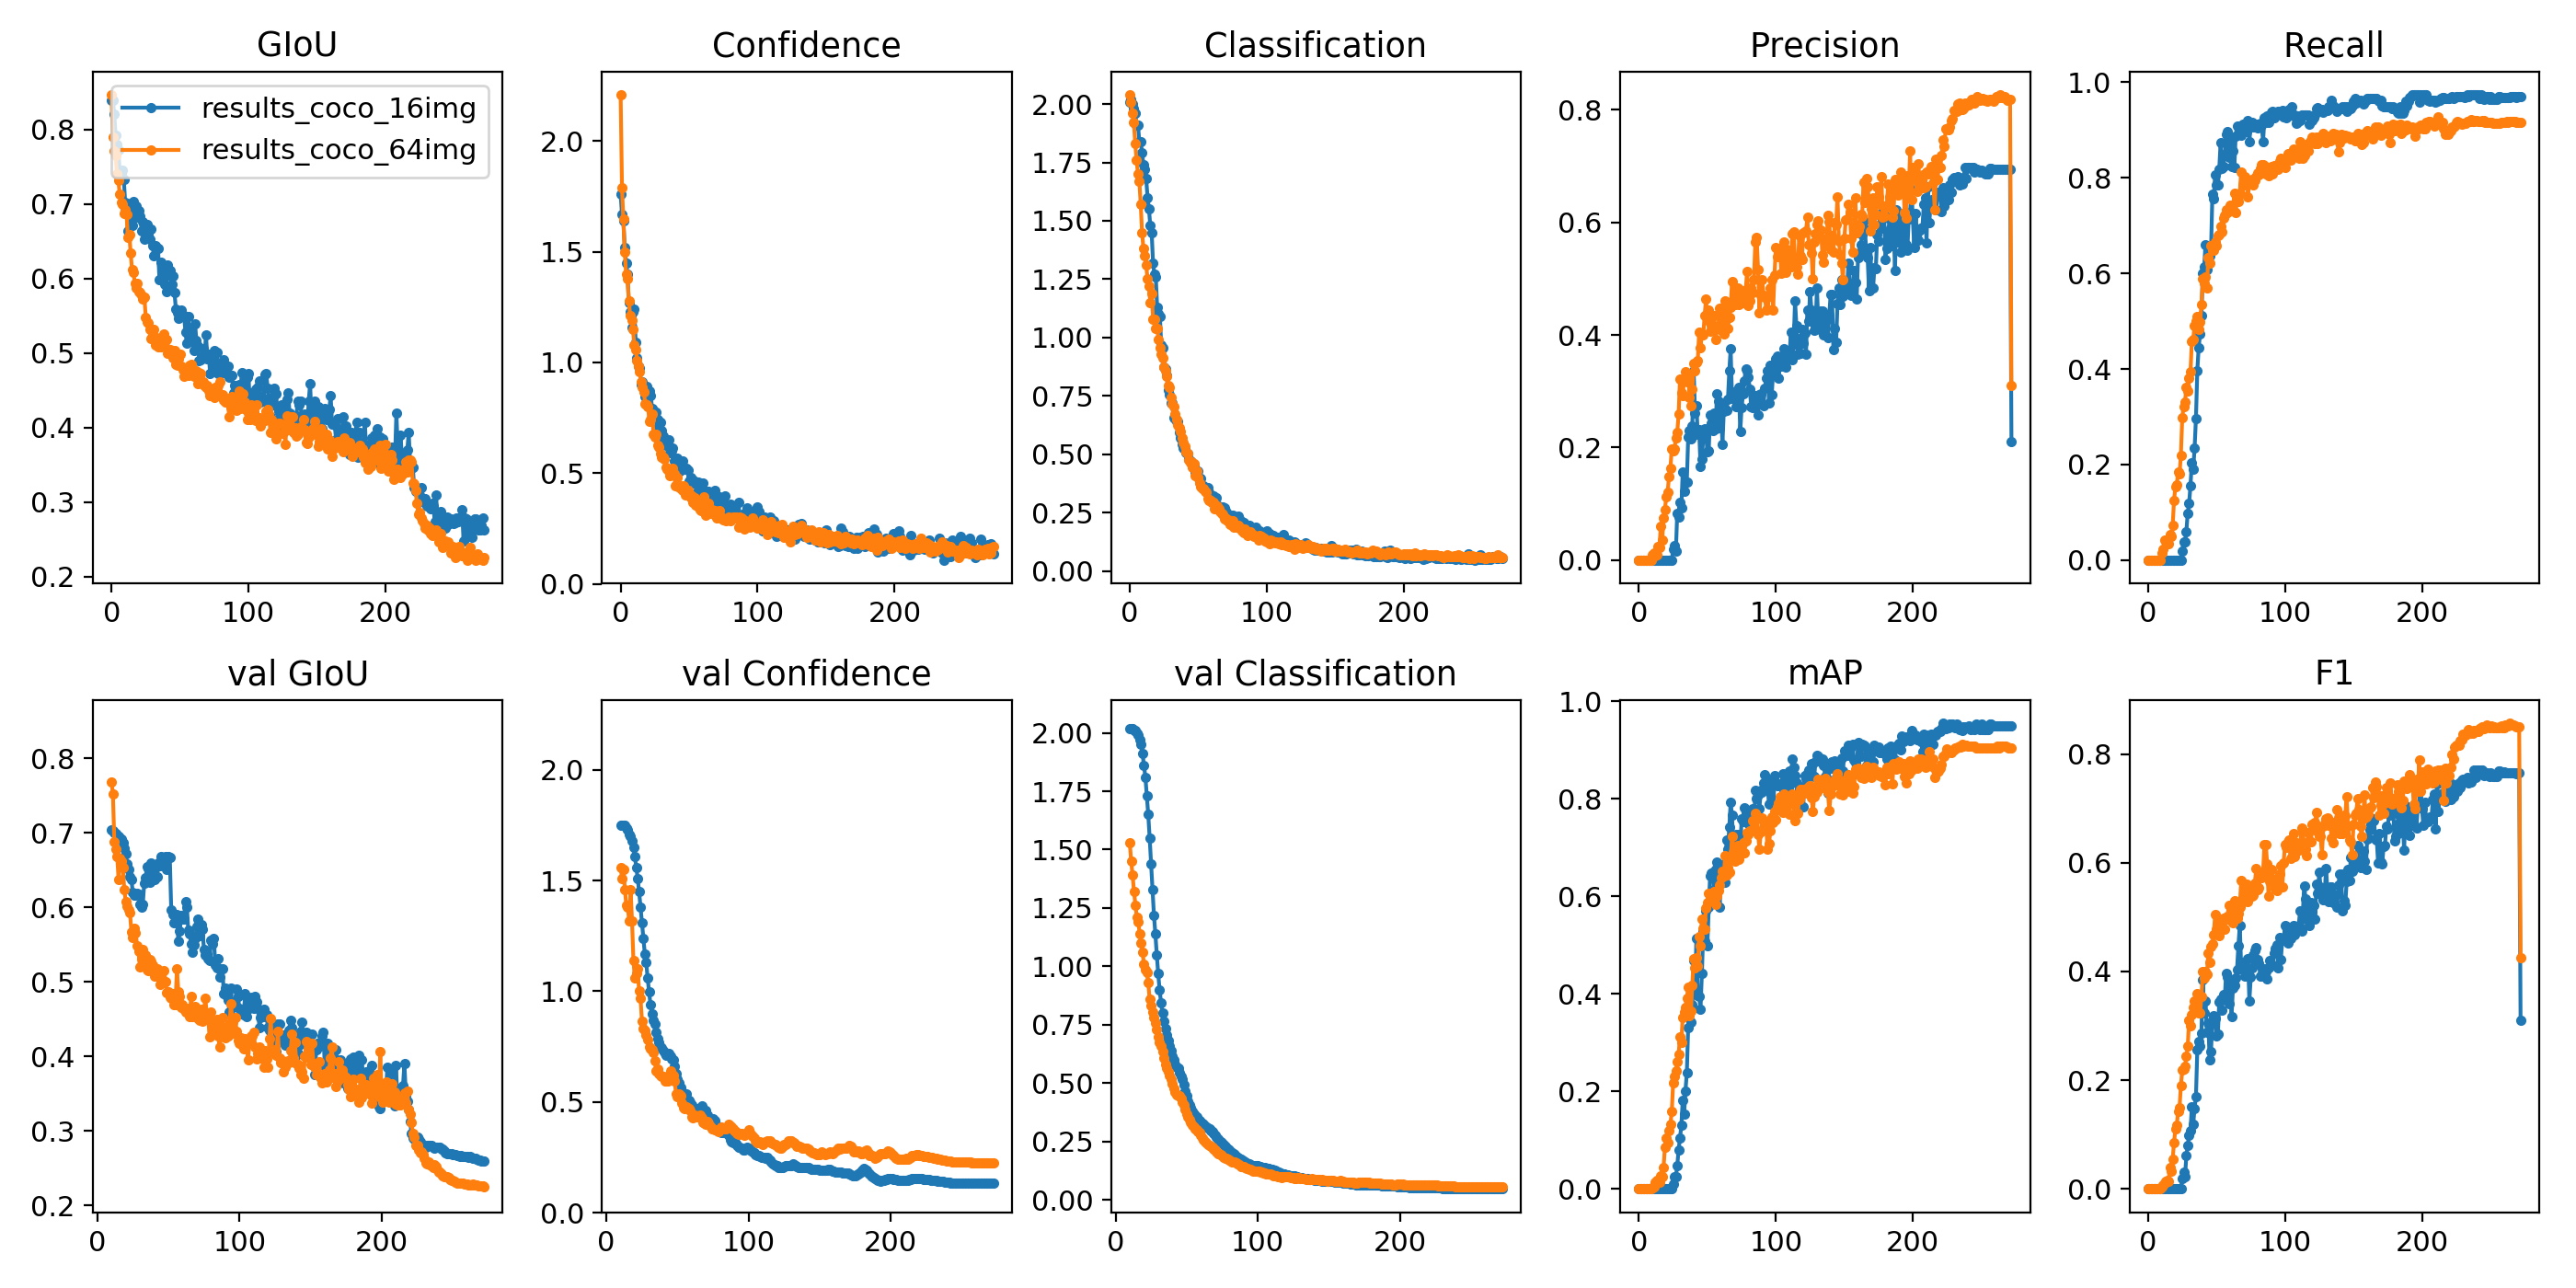

In [8]:
!python3 train.py --data data/coco_16img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_16img.txt  # CUSTOM TRAINING EXAMPLE
!python3 train.py --data data/coco_64img.data --batch-size 16 --accumulate 1 --nosave && mv results.txt results_coco_64img.txt 
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image(filename='results.png', width=800)

Extras below

---




In [0]:
!git pull

In [0]:
%cd yolov3

In [0]:
%ls

In [0]:
# Unit Tests
!python3 detect.py  # detect 2 persons, 1 tie
!python3 test.py --data data/coco_32img.data  # test mAP = 0.8
!python3 train.py --data data/coco_32img.data --epochs 3 --nosave  # train 3 epochs

In [0]:
# Evolve Hyperparameters
!python3 train.py --data data/coco.data --img-size 320 --epochs 1 --evolve